# Building Gradient Boosted Decision Trees

In this exercise, will you will train two gradient boosted decision trees and compare their performances. 

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `GradientBoostingClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the functions `roc_curve` and `auc` to evaluate the model. 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

##  Step 1: Load a 'ready-to-fit' Data Set 

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers, and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

## Step 2: Create Training and Test Data Sets

### a. Create Labeled Examples

Let's obtain columns from our data set to create labeled examples. 
In the code cell below, carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Assign all other columns from DataFrame `df` to the variable `X`. These will be our features. 


In [4]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

### b. Split Labeled Examples Into Training and Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [6]:
X_train.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
10351,3081630,True,False,True,True,True,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33816,3269538,False,False,True,True,False,True,True,True,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36668,3292822,False,False,True,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12787,3100870,True,False,True,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2635,3020642,False,False,True,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step 3: Fit Two Gradient Boosted Decision Tree (GBDT) Classifiers

A gradient boosted decision tree can be thought of as a sequence of individual decision trees that further refine the model's output prediction at each step. The power of GBDTs is in how they learn and weigh these trees in such a way that they can approximate a wide variety of non-linear functions between inputs $X$ and outputs $Y$. 
</p>

We will use the scikit-learn's `GradientBoostingClassifier`. Please refer to the online [documentation](http://scikit-learn.org/stable/modules/ensemble.html") for a brief overview of scikit-learn's ensemble methods.



In the code cell below, build and train two GBDT models, one with a max depth of 2 and the other with a max depth of 10.

1. Use ```GradientBoostingClassifier()``` to create a model object, and assign the result to the variable ```gbdt_2_model```. You will provide the following arguments: <b>n_estimators = 50, max_depth = 2</b>.

2. Fit ```gbdt_2_model``` to the training data.

3. Use the ```model.predict_proba()``` method  to use the fitted model to predict values for the test data. The method will return two columns. Store the values of the *second* column to a list called ```gbdt_2_predictions```. 

4. Use ```GradientBoostingClassifier()``` to create a model object, and assign the result to the variable ```gbdt_10_model```. You will provide the following arguments: <b>n_estimators = 50, max_depth = 10</b>.

5. Fit ```gbdt_10_model``` to the training data.

6. Use the ```model.predict_proba()``` method  to use the fitted model to predict values for the test data. The method will return two columns. Store the values of the *second* column to a list called ```gbdt_10_predictions```.


<b>Note:</b> You can expect this to take several minutes to run.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code. Note: This may take a few minutes to run.

In [7]:
print('Begin GBDT Implementation...')
# 1. Create the GradientBoostingClassifier model object below and assign to variable 'gbdt_2_model'

# YOUR CODE HERE
gbdt_2_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 2)

# 2. Fit the model to the training data below

# YOUR CODE HERE
gbdt_2_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to the 
# variable 'gbdt_2_predictions' below

# YOUR CODE HERE
gbdt_2_predictions = list(gbdt_2_model.predict_proba(X_test)[:,1])

# 4. Create the GradientBoostingClassifier model object below and assign to variable 'gbdt_10_model'

# YOUR CODE HERE
gbdt_10_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10)

# 5. Fit the model to the training data below

# YOUR CODE HERE
gbdt_10_model.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and assign the result to the 
# variable 'gbdt_10_predictions' below

# YOUR CODE HERE
gbdt_10_predictions = list(gbdt_10_model.predict_proba(X_test)[:,1])

print('End')

Begin GBDT Implementation...
End


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [8]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testGBDTModel

try:
    p, err = testGBDTModel(df, gbdt_2_model, gbdt_10_model, gbdt_2_predictions, gbdt_10_predictions)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!


## Step 4: Evaluate the Performance Using ROC and AUC

We will now plot two ROC curves for the two GBDT classifiers on the same graph. 

In the code cell below, use the `roc_curve()` function to record the true positive and false positive rates for both models. 

1. Call `roc_curve()` with arguments `y_test` and `gbdt_2_predictions`. The `roc_curve` function produces three outputs. Save the three items to the following variables, respectively: `fpr_2`, `tpr_2`, and `thresholds_2`.

2. Call `roc_curve()` with arguments `y_test` and `gbdt_10_predictions`. Save the three items to the following variables, respectively: `fpr_10`, `tpr_10`, and `thresholds_10`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code. Note: This may take a few minutes to run.

In [9]:
print('Computing ROC Curve...')

#1. Use roc_curve to record fpr and tpr for gbdt_2_model

# YOUR CODE HERE
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, gbdt_2_predictions)

#2. Use roc_curve to record fpr and tpr for gbdt_10_model

# YOUR CODE HERE
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, gbdt_10_predictions)

print('End')

Computing ROC Curve...
End


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [10]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testROC

try:
    p, err = testROC(df, gbdt_2_model, gbdt_10_model, gbdt_2_predictions, gbdt_10_predictions,
                fpr_2, tpr_2,fpr_10, tpr_10)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!


The code cell below plots the ROC curves for both models. Run the code cell and inspect the results.

Plotting ROC Curve...


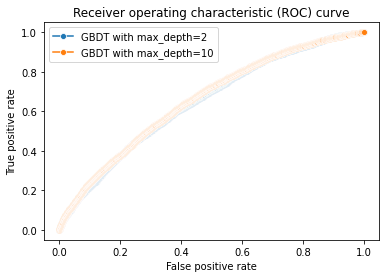

In [12]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2, marker = 'o')
sns.lineplot(x=fpr_10, y=tpr_10, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()


In the code cell below, use the `auc()` function to compute the areas under each of the receiver operating characteristic (ROC) curves. 

For each model, call the function with the `fpr` argument first and the `tpr` argument second. 
Save the results to variables `auc_2` and `auc_10`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [13]:
#1. AUC for gbdt_2_model

# YOUR CODE HERE
auc_2 = auc(fpr_2, tpr_2)

print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))

# 2. AUC for gbdt_10_model

# YOUR CODE HERE
auc_10 = auc(fpr_10, tpr_10)

print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))


AUC of the GBDT model with a max depth of 2 is 0.651
AUC of the GBDT model with a max depth of 10 is 0.659


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell. Note: This may take a few minutes to run.

In [14]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testROC

try:
    p, err = testROC(df, gbdt_2_model, gbdt_10_model, gbdt_2_predictions, gbdt_10_predictions,
                fpr_2, tpr_2,fpr_10, tpr_10, [auc_2, auc_10])
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Running Test...
Correct!
